# Random Forest for Prediction

In [3]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [4]:
rfe_features = ['std_-1_25', 'std_-1_50', 'std_-1_75', 'std_-1_mean', 'std_-1_min',
       'mean_-1_25', 'mean_-1_50', 'mean_-1_75', 'mean_-1_mean', 'mean_-1_min',
       'dwelling_time_0_50', 'dwelling_time_0_mean', 'std_0_25', 'std_0_50',
       'std_0_75', 'std_0_mean', 'std_0_min', 'std_0_max', 'mean_0_25',
       'mean_0_50', 'mean_0_75', 'mean_0_mean', 'mean_0_min', 'mean_0_max',
       'dwelling_time_+1_mean', 'std_+1_25', 'std_+1_50', 'mean_+1_25',
       'mean_+1_50', 'mean_+1_75', 'mean_+1_mean', 'mean_+1_min',
       'mean_+1_max', 'relative_position', 'position_1_G', 'position_5_T']

In [5]:
# Load pickled random forest model
import joblib
pickled_model = joblib.load('../modelling/rf.pkl')

# Prediction

In [6]:
def prediction(csv_fpath):
    ## read csv file
    data = pd.read_csv(csv_fpath)
    print(data.shape)

    ## save transcript and position col for concatenation later
    data_id_col = data[["transcript", "position"]]

    ## predict using rfc
    data_pred = pickled_model.predict_proba(data[rfe_features])[:,1]
    print(len(data_pred))

    ## convert predictions to dataframe
    data_pred_df = pd.DataFrame(data_pred, columns = ['score'])

    ## 
    data_pred_df = pd.concat([data_id_col, data_pred_df], axis = 1)
    print(f"Prediction file is of shape: {data_pred_df.shape}")

    return data_pred_df

In [ ]:
k562_rep4_run1_path = "/Users/claudia/Downloads/K562_rep4_run1.csv"
k562_rep4_run1_pred = prediction(k562_rep4_run1_path)
k562_rep4_run1_pred.head()

In [ ]:
k562_rep4_run1_pred.to_csv("data/aws_predictions/k562_rep4_run1_prediction.csv")

In [ ]:
k562_rep5_run1_path = "/Users/claudia/Downloads/K562_rep5_run1.csv"
k562_rep5_run1_pred = prediction(k562_rep5_run1_path)
k562_rep5_run1_pred.head()

(116519, 76)
116519
Prediction file is of shape: (116519, 3)


,transcript,position,score
0,ENST00000371582,1030,0.004545
1,ENST00000371582,105,0.013636
2,ENST00000371582,1123,0.018182
3,ENST00000371582,147,0.072751
4,ENST00000371582,242,0.045583


In [ ]:
k562_rep5_run1_pred.to_csv("../data/aws_predictions/k562_rep5_run1_prediction.csv")

In [ ]:
k562_rep6_run1_path = "/Users/claudia/Downloads/K562_rep6_run1.csv"
k562_rep6_run1_pred = prediction(k562_rep6_run1_path)
k562_rep6_run1_pred.head()

(99502, 76)
99502
Prediction file is of shape: (99502, 3)


,transcript,position,score
0,ENST00000373020,1013,0.177273
1,ENST00000373020,1149,0.150000
2,ENST00000373020,512,0.322727
3,ENST00000373020,689,0.131818
4,ENST00000373020,823,0.009091


In [ ]:
k562_rep6_run1_pred.to_csv("../data/aws_predictions/k562_rep6_run1_prediction.csv")

In [ ]:
mcf7_rep3_run1_path = "/Users/claudia/Downloads/MCF7_rep3_run1.csv"
mcf7_rep3_run1_pred = prediction(mcf7_rep3_run1_path)
mcf7_rep3_run1_pred.head()

(119481, 76)
119481
Prediction file is of shape: (119481, 3)


,transcript,position,score
0,ENST00000373020,1006,0.009091
1,ENST00000373020,1013,0.009091
2,ENST00000373020,1149,0.000000
3,ENST00000373020,512,0.018182
4,ENST00000373020,689,0.009091


In [ ]:
mcf7_rep3_run1_pred.to_csv("../data/aws_predictions/mcf7_rep3_run1_prediction.csv")

In [ ]:
mcf7_rep4_run1_path = "/Users/claudia/Downloads/MCF7_rep4_run1.csv"
mcf7_rep4_run1_pred = prediction(mcf7_rep4_run1_path)
mcf7_rep4_run1_pred.head()

(119481, 76)
119481
Prediction file is of shape: (119481, 3)


,transcript,position,score
0,ENST00000373020,1006,0.009091
1,ENST00000373020,1013,0.009091
2,ENST00000373020,1149,0.000000
3,ENST00000373020,512,0.018182
4,ENST00000373020,689,0.009091


In [ ]:
mcf7_rep4_run1_pred.to_csv("../data/aws_predictions/mcf7_rep4_run1_prediction.csv")

In [ ]:
%pwd

'/Users/claudia/DSA4262-ACMXZ/prediction'

# Data.JSON

In [7]:
## function to get key of a dictionary
def get_key(dictionary):
    key_object = dictionary.keys()
    key = list(key_object)[0]
    return key

In [8]:
## function to help concatenate columns to get transcript, position, nucleotides
def concat_col(transcript, position, nucleotide, n):
    t_df = pd.DataFrame([transcript]*n)
    p_df = pd.DataFrame([position]*n)
    nu_df = pd.DataFrame([nucleotide]*n)
    n_df = pd.DataFrame([n]*n)

    ## concat columns together
    final_df = pd.concat([t_df, p_df, nu_df, n_df], axis = 1)
    final_df.columns = ['transcript', 'position', 'nucleotides', 'reads_count']
    return final_df

In [9]:
## function to parse line in json file
def parse_line(line):
    ## get transcript
    t = get_key(line)

    ## get position
    p = get_key(line[t])

    ## get nucleotide seq
    nu = get_key(line[t][p])

    ## get number of reads
    reads_count = len(line[t][p][nu])

    ## get dataframe of list of reads
    reads = pd.DataFrame(line[t][p][nu])

    ## concat columns together to get transcript, position, nucleotides and all dwelling time, std, mean
    df = pd.concat([concat_col(t, p, nu, reads_count), reads], axis = 1)
    df.columns = ['transcript', 'position', 'nucleotides', 'reads_count', 'dwellingtime_-1', 'std_-1', 'mean_-1', 'dwellingtime_0', 'std_0', 'mean_0', 'dwellingtime_+1', 'std_+1', 'mean_+1']

    return df

In [10]:
import json

In [11]:
data0 = [json.loads(line) for line in open("/Users/claudia/Downloads/data.json", 'r')]

## parse all lines in json file into dataframe for concatenation
reads0_df = [parse_line(data0[i]) for i in range(len(data0))]
data0_df = pd.concat(reads0_df, axis = 0)
data0_df.head()

,transcript,position,nucleotides,reads_count,dwellingtime_-1,std_-1,mean_-1,dwellingtime_0,std_0,mean_0,dwellingtime_+1,std_+1,mean_+1
0,ENST00000000233,244,AAGACCA,185,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1
1,ENST00000000233,244,AAGACCA,185,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9
2,ENST00000000233,244,AAGACCA,185,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6
3,ENST00000000233,244,AAGACCA,185,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4
4,ENST00000000233,244,AAGACCA,185,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2


In [12]:
import os

In [13]:
import numpy as np
import pickle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from category_encoders import OneHotEncoder

sys.path.append(os.path.abspath("../util/model/"))
from training import get_percent

In [14]:
# gene_id and labels removed from groupby and temp.columns
def feature_eng(df):
    temp = pd.DataFrame(df.groupby(['transcript', 'position', 'nucleotides', 'reads_count'], as_index=False)
                           .agg({'dwellingtime_-1': [get_percent(25), get_percent(50), get_percent(75), np.mean, np.min, np.max],
                                'std_-1': [get_percent(25), get_percent(50), get_percent(75), np.mean, np.min, np.max],
                                'mean_-1': [get_percent(25), get_percent(50), get_percent(75), np.mean, np.min, np.max],
                                'dwellingtime_0': [get_percent(25), get_percent(50), get_percent(75), np.mean, np.min, np.max],
                                'std_0': [get_percent(25), get_percent(50), get_percent(75), np.mean, np.min, np.max],
                                'mean_0': [get_percent(25), get_percent(50), get_percent(75), np.mean, np.min, np.max],
                                'dwellingtime_+1': [get_percent(25), get_percent(50), get_percent(75), np.mean, np.min, np.max],
                                'std_+1': [get_percent(25), get_percent(50), get_percent(75), np.mean, np.min, np.max],
                                'mean_+1': [get_percent(25), get_percent(50), get_percent(75), np.mean, np.min, np.max]}))
    temp.columns = ['transcript', 'position', 'nucleotides', 'reads_count',
                        'dwelling_time_-1_25', 'dwelling_time_-1_50', 'dwelling_time_-1_75', 'dwelling_time_-1_mean','dwelling_time_-1_min', 'dwelling_time_-1_max',
                        'std_-1_25', 'std_-1_50', 'std_-1_75', 'std_-1_mean','std_-1_min', 'std_-1_max',
                        'mean_-1_25', 'mean_-1_50', 'mean_-1_75', 'mean_-1_mean','mean_-1_min', 'mean_-1_max',
                        'dwelling_time_0_25', 'dwelling_time_0_50', 'dwelling_time_0_75', 'dwelling_time_0_mean','dwelling_time_0_min','dwelling_time_0_max',
                        'std_0_25', 'std_0_50', 'std_0_75', 'std_0_mean','std_0_min', 'std_0_max',
                        'mean_0_25', 'mean_0_50', 'mean_0_75', 'mean_0_mean','mean_0_min', 'mean_0_max',
                        'dwelling_time_+1_25', 'dwelling_time_+1_50', 'dwelling_time_+1_75', 'dwelling_time_+1_mean','dwelling_time_+1_min','dwelling_time_+1_max',
                        'std_+1_25', 'std_+1_50', 'std_+1_75', 'std_+1_mean','std_+1_min', 'std_+1_max',
                        'mean_+1_25', 'mean_+1_50', 'mean_+1_75', 'mean_+1_mean','mean_+1_min', 'mean_+1_max']
    return temp

# gene_id removed from groupby
def relative_position(df):
    df["position"] = df["position"].astype(int)

    ## find relative position of each read in each transcript
    df["relative_position"] = df.groupby(["transcript"])["position"].transform(lambda x: (x - x.min())/(x.max()-x.min()))

    ## note: have NAs because there's transcripts with only one position
    ## fill the NAs with 0
    df["relative_position"] = df["relative_position"].fillna(0)

    return df

## variables needed for encoding
pipe = pickle.load(open("../data/raw_data/encoding_pipeline.pkl", "rb"))

cols_to_map = ['reads_count', 'dwelling_time_-1_25', 'dwelling_time_-1_50', 'dwelling_time_-1_75', 
                'dwelling_time_-1_mean', 'dwelling_time_-1_min', 'dwelling_time_-1_max', 'std_-1_25', 
                'std_-1_50', 'std_-1_75', 'std_-1_mean', 'std_-1_min', 'std_-1_max', 'mean_-1_25', 
                'mean_-1_50', 'mean_-1_75', 'mean_-1_mean', 'mean_-1_min', 'mean_-1_max', 
                'dwelling_time_0_25', 'dwelling_time_0_50', 'dwelling_time_0_75', 'dwelling_time_0_mean', 
                'dwelling_time_0_min', 'dwelling_time_0_max', 'std_0_25', 'std_0_50', 'std_0_75', 
                'std_0_mean', 'std_0_min', 'std_0_max', 'mean_0_25', 'mean_0_50', 'mean_0_75', 'mean_0_mean', 
                'mean_0_min', 'mean_0_max', 'dwelling_time_+1_25', 'dwelling_time_+1_50', 'dwelling_time_+1_75', 
                'dwelling_time_+1_mean', 'dwelling_time_+1_min', 'dwelling_time_+1_max', 'std_+1_25', 
                'std_+1_50', 'std_+1_75', 'std_+1_mean', 'std_+1_min', 'std_+1_max', 'mean_+1_25', 'mean_+1_50', 
                'mean_+1_75', 'mean_+1_mean', 'mean_+1_min', 'mean_+1_max', 'relative_position', 'position_0_C', 
                'position_0_G', 'position_0_T', 'position_0_A', 'position_1_A', 'position_1_G', 'position_1_T', 
                'position_2_A', 'position_2_G', 'position_3_A', 'position_4_C', 'position_5_C', 'position_5_A', 
                'position_5_T', 'position_6_T', 'position_6_A', 'position_6_G', 'position_6_C']

def encoding(df, columns_to_map):
    id_val = df[['transcript','position']] ## needed to concat with pred proba for submission

    for i in range(7):
        df['position_' + str(i)] = df['nucleotides'].apply(lambda x: x[i])
    
    df_enc = pd.DataFrame({col: vals for vals, col in zip(pipe.transform(df).T, columns_to_map)})

    return df_enc, id_val

In [15]:
## preprocess dataset 1
percentile_df0 = feature_eng(data0_df)
print(percentile_df0.shape)

relative_position_df0 = relative_position(percentile_df0)
print(relative_position_df0.shape)

encoded_df0, id_val_df0 = encoding(relative_position_df0, cols_to_map)
print(encoded_df0.shape, id_val_df0.shape)

data0_pp = encoded_df0

(121838, 58)
(121838, 59)
(121838, 74) (121838, 2)


In [16]:
data0_pred = pickled_model.predict_proba(data0_pp[rfe_features])[:,1]
print(len(data0_pred))

data0_res = pd.DataFrame(data0_pred, columns = ['score'])

data0_res = pd.concat([id_val_df0, data0_res], axis = 1)
print(data0_res.shape)

121838
(121838, 3)


In [17]:
info_data_path = "../data/raw_data/data.info"
with open(info_data_path, 'r') as f:
    info = f.read().splitlines()

info_list = [info[i].split(",") for i in range(len(info))]
info_df = pd.DataFrame(info_list[1:]) 
info_df.columns = info_list[0]

In [50]:
data0_pred_labels.dtypes

transcript     object
position        int64
score         float64
gene_id        object
label           int64
0.0             int64
0.001           int64
0.002           int64
0.003           int64
0.004           int64
0.005           int64
0.006           int64
0.007           int64
0.008           int64
0.009           int64
0.01            int64
0.011           int64
0.012           int64
0.013           int64
0.014           int64
postion        object
dtype: object

In [53]:
info_df["transcript_position"] = info_df["transcript_position"].astype(str).astype(int)

In [54]:
info_df.dtypes

gene_id                object
transcript_id          object
transcript_position     int64
label                  object
dtype: object

In [55]:
data0_pred_labels = data0_res.merge(info_df, how = "left", left_on = ["transcript", "position"], right_on = ["transcript_id", "transcript_position"])
data0_pred_labels.head()

,transcript,position,score,gene_id,transcript_id,transcript_position,label
0,ENST00000000233,244,0.009091,ENSG00000004059,ENST00000000233,244,0
1,ENST00000000233,261,0.000000,ENSG00000004059,ENST00000000233,261,0
2,ENST00000000233,316,0.027273,ENSG00000004059,ENST00000000233,316,0
3,ENST00000000233,332,0.009197,ENSG00000004059,ENST00000000233,332,0
4,ENST00000000233,368,0.013737,ENSG00000004059,ENST00000000233,368,0


In [56]:
#data0_pred_labels = pd.concat([data0_res, info_df], axis = 1, join = "outer")
data0_pred_labels.drop(["transcript_id", "transcript_position"], axis = 1, inplace = True)
data0_pred_labels.head()

,transcript,position,score,gene_id,label
0,ENST00000000233,244,0.009091,ENSG00000004059,0
1,ENST00000000233,261,0.000000,ENSG00000004059,0
2,ENST00000000233,316,0.027273,ENSG00000004059,0
3,ENST00000000233,332,0.009197,ENSG00000004059,0
4,ENST00000000233,368,0.013737,ENSG00000004059,0


In [68]:
data0_pred_labels[["label", "score"]].groupby(["label"]).mean()

,score
label,
0,0.023185
1,0.642337


In [69]:
data0_pred_labels[data0_pred_labels["label"] == 1]

,transcript,position,score,gene_id,label,0.0,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.011,0.012,0.013,0.014
17,ENST00000000233,913,0.504545,ENSG00000004059,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
38,ENST00000000412,2440,0.818182,ENSG00000003056,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
39,ENST00000000412,2462,0.360568,ENSG00000003056,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
41,ENST00000000412,2499,0.304545,ENSG00000003056,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
136,ENST00000002596,1280,0.481818,ENSG00000002587,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121832,ENST00000641834,575,0.477536,ENSG00000167747,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
121833,ENST00000641834,610,0.628409,ENSG00000167747,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
121835,ENST00000641834,864,0.904545,ENSG00000167747,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
121836,ENST00000641834,926,0.895455,ENSG00000167747,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [71]:
data0_pred_labels['label'] = data0_pred_labels['label'].astype(str).astype(int)
numbers = [float(x)/100 for x in range(100)]
for i in numbers:
    data0_pred_labels[i] = data0_pred_labels.score.map(lambda x:1 if x>=i else 0)
data0_pred_labels.head()

/var/folders/hf/vxvn1cm55jncfc4dx4xp_q2h0000gn/T/ipykernel_7020/1860972837.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data0_pred_labels[i] = data0_pred_labels.score.map(lambda x:1 if x>=i else 0)
/var/folders/hf/vxvn1cm55jncfc4dx4xp_q2h0000gn/T/ipykernel_7020/1860972837.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data0_pred_labels[i] = data0_pred_labels.score.map(lambda x:1 if x>=i else 0)
/var/folders/hf/vxvn1cm55jncfc4dx4xp_q2h0000gn/T/ipykernel_7020/1860972837.py:4: PerformanceWarning: DataFrame is highly fra

,transcript,position,score,gene_id,label,0.0,0.001,0.002,0.003,0.004,...,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,ENST00000000233,244,0.009091,ENSG00000004059,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,ENST00000000233,261,0.000000,ENSG00000004059,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ENST00000000233,316,0.027273,ENSG00000004059,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ENST00000000233,332,0.009197,ENSG00000004059,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ENST00000000233,368,0.013737,ENSG00000004059,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [85]:
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity', 'Precision',"FNR",'f1'])

In [38]:
cutoff_df

,Probability,Accuracy,Sensitivity,Specificity,FNR


In [35]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc, accuracy_score, plot_confusion_matrix

In [ ]:
for i in numbers:
    cm1 = metrics.confusion_matrix(data0_pred_labels.label,data0_pred_labels[i])
    
    ## define roc metrics
    y_pred = data0_pred_labels[i]
    y_test = data0_pred_labels["label"]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    ## plot roc curve
    plt.figure()
    plt.plot(fpr, tpr, label = 'Random Forest Classifier (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Random Forest Receiver operating characteristic')
    plt.legend(loc = "lower right")
    plt.show()

/var/folders/hf/vxvn1cm55jncfc4dx4xp_q2h0000gn/T/ipykernel_7020/2441805686.py:20: RuntimeWarning: invalid value encountered in long_scalars
  Precision = cm1[1,1]/(cm1[1,1]+cm1[0,1])
/var/folders/hf/vxvn1cm55jncfc4dx4xp_q2h0000gn/T/ipykernel_7020/2441805686.py:20: RuntimeWarning: invalid value encountered in long_scalars
  Precision = cm1[1,1]/(cm1[1,1]+cm1[0,1])
/var/folders/hf/vxvn1cm55jncfc4dx4xp_q2h0000gn/T/ipykernel_7020/2441805686.py:20: RuntimeWarning: invalid value encountered in long_scalars
  Precision = cm1[1,1]/(cm1[1,1]+cm1[0,1])


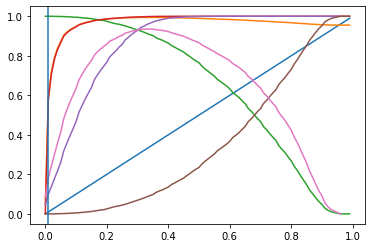

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


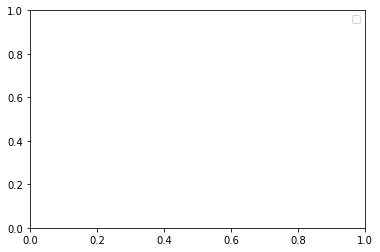

In [86]:
for i in numbers:
    cm1 = metrics.confusion_matrix(data0_pred_labels.label,data0_pred_labels[i])

    """ ## plot confusion matrix
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm1)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show() """

    ## calculating accuracy score
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    fnr = cm1[1,0]/(cm1[1,0]+cm1[1,1])
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    Precision = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    f1 = 2*(Precision*Sensitivity)/(Precision+Sensitivity)
    cutoff_df.loc[i] =[ i ,accuracy,Sensitivity,Specificity, Precision,fnr,f1]
    
plt.plot(cutoff_df)
plt.axvline(0.009)
plt.show()
plt.legend()

In [87]:
cutoff_df.sort_values("f1", ascending=False)

,Probability,Accuracy,Sensitivity,Specificity,Precision,FNR,f1
0.35,0.35,0.994386,0.902466,0.998711,0.970536,0.097534,0.935264
0.33,0.33,0.994312,0.913425,0.998118,0.958046,0.086575,0.935203
0.34,0.34,0.994337,0.907397,0.998427,0.964473,0.092603,0.935065
0.32,0.32,0.994181,0.920000,0.997671,0.948945,0.080000,0.934248
0.31,0.31,0.994115,0.925479,0.997345,0.942522,0.074521,0.933923
0.36,0.36,0.994156,0.891507,0.998986,0.976395,0.108493,0.932022
0.37,0.37,0.994008,0.884384,0.999166,0.980360,0.115616,0.929902
0.30,0.30,0.993664,0.930959,0.996614,0.928246,0.069041,0.929601
0.38,0.38,0.993910,0.879269,0.999304,0.983453,0.120731,0.928447
0.29,0.29,0.993393,0.935890,0.996098,0.918609,0.064110,0.927169


In [77]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [27]:
cutoff_df 
plt.show()

In [40]:
i

0.014

# Using Youtube Tutorial

In [62]:
#### Calculate the ROc Curve
y_test = data0_pred_labels["label"]
fpr, tpr, thresholds = roc_curve(y_test, data0_pred_labels["score"])
thresholds

array([1.96818182e+00, 9.68181818e-01, 9.59090909e-01, ...,
       3.21460718e-06, 3.15437512e-06, 0.00000000e+00])

In [63]:
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(data0_pred_labels["score"]>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
376,0.340909,0.994476
374,0.340987,0.994476
375,0.340963,0.994468
373,0.341018,0.994468
370,0.345455,0.994443


In [64]:
accuracy_ls.max()

thresholds    1.968182
accuracy      0.994476
dtype: float64

In [90]:
A549_rep5_run1 = pd.read_csv("../data/aws_predictions/A549_rep5_run1_prediction.csv")
A549_rep6_run1 = pd.read_csv("../data/aws_predictions/A549_rep6_run1_prediction.csv")

In [95]:
A549_rep5_run1.head()

,transcript,position,score,label
0,ENST00000373020,1006,0.004545,0
1,ENST00000373020,1013,0.009091,0
2,ENST00000373020,1149,0.004545,0
3,ENST00000373020,512,0.013636,0
4,ENST00000373020,689,0.004545,0


In [94]:
A549_rep5_run1["label"] = A549_rep5_run1.score.map(lambda x:1 if x>=0.35 else 0)

In [96]:
A549_rep6_run1["label"] = A549_rep6_run1.score.map(lambda x:1 if x>=0.35 else 0)

In [97]:
A549_rep6_run1.head()

,transcript,position,score,label
0,ENST00000373020,1006,0.031818,0
1,ENST00000373020,1013,0.009091,0
2,ENST00000373020,1149,0.000000,0
3,ENST00000373020,512,0.036364,0
4,ENST00000373020,689,0.027273,0


In [98]:
test = A549_rep5_run1.merge(info_df, how = "left", left_on = ["transcript", "position"], right_on = ["transcript_id", "transcript_position"])
test.head()

,transcript,position,score,label_x,gene_id,transcript_id,transcript_position,label_y
0,ENST00000373020,1006,0.004545,0,ENSG00000000003,ENST00000373020,1006,0
1,ENST00000373020,1013,0.009091,0,ENSG00000000003,ENST00000373020,1013,0
2,ENST00000373020,1149,0.004545,0,ENSG00000000003,ENST00000373020,1149,0
3,ENST00000373020,512,0.013636,0,ENSG00000000003,ENST00000373020,512,0
4,ENST00000373020,689,0.004545,0,ENSG00000000003,ENST00000373020,689,0


In [101]:
test..isnull().values.any()

False

: 

In [99]:
## define roc metrics
y_pred = test.label_x
y_test = test.label_y
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

## plot roc curve
plt.figure()
plt.plot(fpr, tpr, label = 'Random Forest Classifier (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.show()

ValueError: y_true takes value in {'0', '1'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.